In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [45]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [46]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [47]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
train.iloc[0, 1:]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

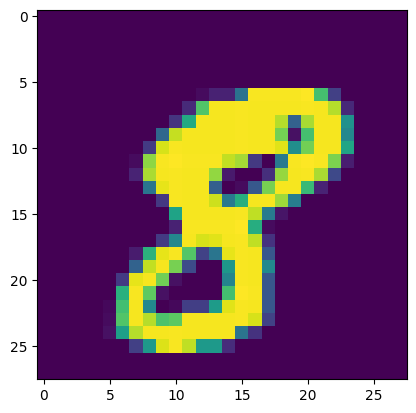

In [49]:
plt.imshow(train.iloc[10, 1:].values.reshape(28,28))

In [50]:
from sklearn.preprocessing import OneHotEncoder

X_train = train.iloc[:, 1:]
y_train = train["label"]      #train.iloc[:, 0]
X_test = test

print("Train:", X_train.shape, y_train.shape)
print("Test: ", X_test.shape)

Train: (42000, 784) (42000,)
Test:  (28000, 784)


In [51]:
def normalize(image):
    return tf.cast(image, tf.float32)/255.0

In [52]:
X_train_norm = X_train.apply(normalize)
X_test_norm = X_test.apply(normalize)

In [53]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [54]:
input_layer = Input(shape=(X_train.shape[1],), name="input_layer")

layer1 = Dense(50, activation="relu", name="layer1")(input_layer)
layer2 = Dense(50, activation="relu", name="layer2")(layer1)

output_layer = Dense(10, activation="softmax", name="output_layer")(layer2)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 layer1 (Dense)              (None, 50)                39250     
                                                                 
 layer2 (Dense)              (None, 50)                2550      
                                                                 
 output_layer (Dense)        (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


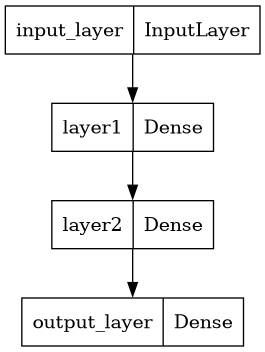

In [55]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [56]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_norm, y_train, epochs=500, verbose=True, batch_size=32, validation_split=0.2)

Epoch 1/500
1050/1050 [==============================] - 4s 3ms/step - loss: 0.9728 - accuracy: 0.7346 - val_loss: 0.4593 - val_accuracy: 0.8818
Epoch 2/500
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3834 - accuracy: 0.8948 - val_loss: 0.3254 - val_accuracy: 0.9117
Epoch 3/500
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3051 - accuracy: 0.9141 - val_loss: 0.2854 - val_accuracy: 0.9219
Epoch 4/500
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2692 - accuracy: 0.9237 - val_loss: 0.2580 - val_accuracy: 0.9260
Epoch 5/500
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2440 - accuracy: 0.9300 - val_loss: 0.2389 - val_accuracy: 0.9317
Epoch 6/500
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2253 - accuracy: 0.9349 - val_loss: 0.2253 - val_accuracy: 0.9356
Epoch 7/500
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2089 - accuracy: 0.9403 - val_loss: 0.2132 - val_ac

In [57]:
score = model.evaluate(X_train_norm, y_train)
print("loss:", score[0])
print("accuracy:", score[1])

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0922 - accuracy: 0.9933
loss: 0.09217894822359085
accuracy: 0.9933333396911621


In [58]:
y_dev = model.predict(X_train)

1313/1313 [==============================] - 2s 1ms/step


In [59]:
y_dev.shape

(42000, 10)

In [60]:
y_dev

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [61]:
pd.DataFrame(y_dev)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train_enc = encoder.fit_transform(y_train.array.reshape(-1,1))

In [63]:
y_dev_dec = encoder.inverse_transform(y_dev)

In [64]:
y_dev_dec

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]])

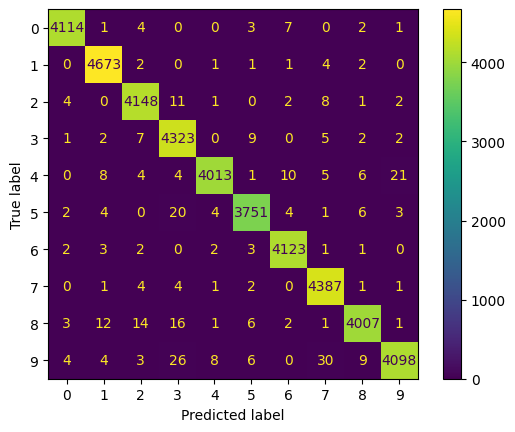

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_dev_dec)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

In [66]:
y_pred = model.predict(X_test)

875/875 [==============================] - 1s 1ms/step


In [67]:
y_pred

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [68]:
y_pred_dec = encoder.inverse_transform(y_pred)

In [69]:
y_pred_dec

array([[2],
       [0],
       [9],
       ...,
       [3],
       [9],
       [2]])

In [70]:
pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [71]:
df_submit = pd.DataFrame({"ImageId":[i for i in range(1, len(y_pred_dec)+1)], "Label":y_pred_dec.flatten()})
df_submit

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [72]:
df_submit.to_csv("submission.csv", index=False)